In [4]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test /255

In [6]:
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
    
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=10, callbacks=[early_stop])

/home/sandesh/projects/handwrritedn_digit_classifier_minst/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1744828118.209423   87937 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2282 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Epoch 1/10


2025-04-17 00:13:38.953136: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-04-17 00:13:39.059750: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
I0000 00:00:1744828119.793816   88024 service.cc:152] XLA service 0x7aa3300070b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744828119.793833   88024 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-04-17 00:13:39.815201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744828119.933076   88024 cuda_dnn.cc:529] Loaded cuDNN version 90300


 104/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5242 - loss: 1.4756

I0000 00:00:1744828121.430548   88024 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8463 - loss: 0.4935
Epoch 2/10
 109/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9507 - loss: 0.1827

/home/sandesh/projects/handwrritedn_digit_classifier_minst/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9535 - loss: 0.1552
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9649 - loss: 0.1134
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9701 - loss: 0.0957
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9739 - loss: 0.0852
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9764 - loss: 0.0738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9776 - loss: 0.0698
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9799 - loss: 0.0617
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9818 - loss: 0.0596
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9836 - loss: 0.0512


In [8]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.0955


[0.07598897069692612, 0.980400025844574]

In [9]:
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [10]:
predict[0]

array([3.5740255e-15, 1.6655372e-09, 7.9022860e-10, 2.6079474e-07,
       4.0023526e-11, 8.1370168e-11, 9.7520582e-19, 9.9999940e-01,
       1.1536271e-12, 3.9109065e-07], dtype=float32)

In [11]:
np.argmax(predict[0])

np.int64(7)

In [12]:
y_test[0]

np.uint8(7)

In [13]:
from PIL import Image, ImageOps

In [106]:
image = Image.open("zero.png")

In [107]:
image.resize((28,28))

In [108]:
grayscale = image.convert('L')
inverted = ImageOps.invert(grayscale)
resized = inverted.resize((28,28))


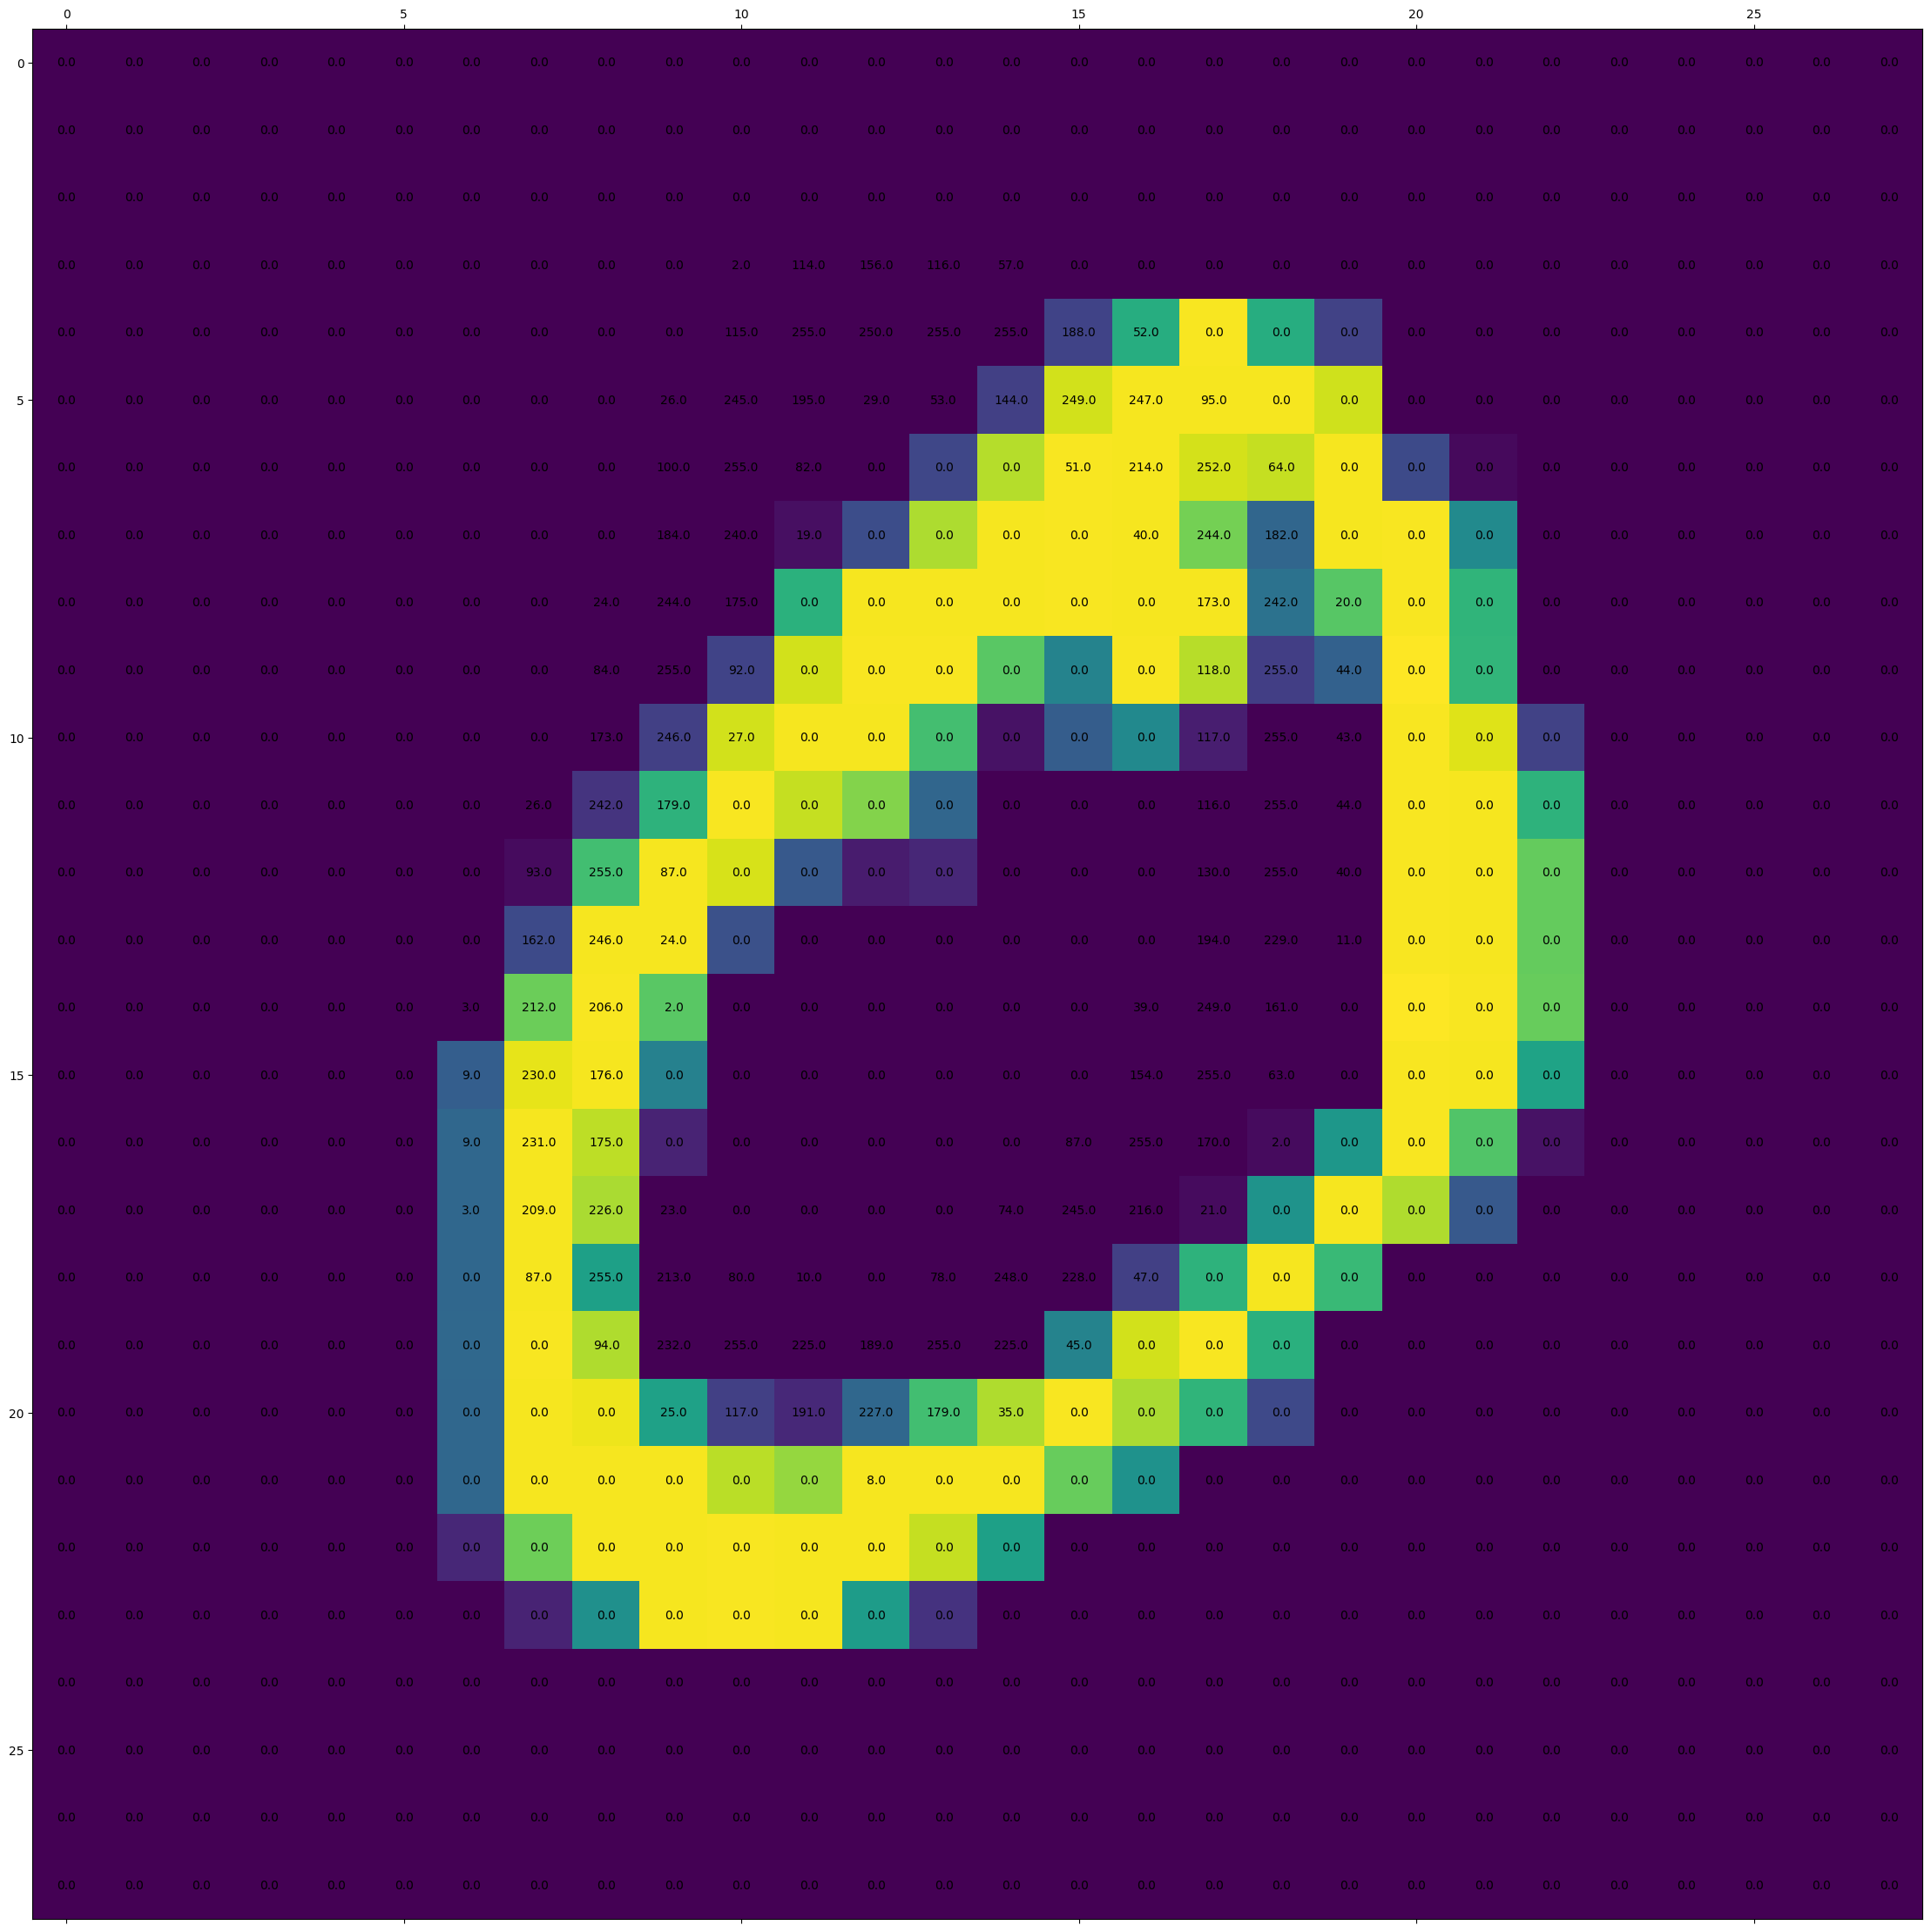

In [116]:
np_array = np.array(resized)

# np_array[np_array >= 95 ] = 255
# np_array[np_array < 95 ] = 0
plt.figure(figsize=(28, 28))
plt.matshow(x_train[1], fignum=1)
for (i, j), z in np.ndenumerate(np_array):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

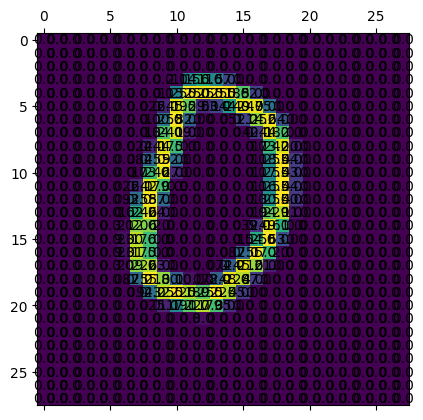

In [117]:
plt.matshow(np_array, fignum=1)
for (i, j), z in np.ndenumerate(np_array):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')